In [1]:
import rasterio
from osgeo import gdal, ogr
from PIL import Image
import cv2 as cv
import glob
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import random

In [2]:
# SatelliteImagecropping

def multibandimagecrop(inputpath, crop_width, crop_height, outputpath):
    all_files=glob.glob(os.path.join(inputpath, '*.TIF'))
    print(len(all_files))
    for file in all_files:
        with rasterio.open(file, 'r') as src:
            print(src.shape)
            
            if src.height > src.width:
                xmin, xmax = 0, src.width - crop_width
                ymin, ymax = 0, src.height - crop_height
                xoff, yoff = random.randint(xmin, xmax), random.randint(ymin, ymax)
                window =  rasterio.windows.Window(xoff, yoff, crop_height, crop_width)
                
                transform = src.window_transform(window)
            
                profile = src.profile
                profile.update({
                    'height': crop_height,
                    'width': crop_width,
                    'transform': transform})
            elif src.width > src.height:
                # print(src.shape)
                height=crop_width
                width=crop_height
                # crop_height=width
                # print(crop_height,crop_width)
                xmin, xmax = 0, src.width - width
                ymin, ymax = 0, src.height - height
                xoff, yoff = random.randint(ymin, ymax), random.randint(xmin, xmax)
                window =  rasterio.windows.Window(xoff, yoff, height, width)
                
                transform = src.window_transform(window)
            
                profile = src.profile
                profile.update({
                    'height': height,
                    'width': width,
                    'transform': transform})
                # print(src.shape)
                    
            output_file = os.path.join(outputpath, f'{os.path.splitext(os.path.basename(file))[0]}.TIF')
            
            with rasterio.open(output_file, 'w', **profile) as dst:
                # Read the data from the window and write it to the output raster
                dst.write(src.read(window=window))
                # dst.fill.fillnodata()
                print(dst.shape)
            
            # print(org_width, org_height)

In [3]:
# SatelliteImagecropping

def threebandsatelliteimagecrop(inputpath, crop_width, crop_height, outputpath):
    all_files=glob.glob(os.path.join(inputpath, '*.PNG'))
    print(len(all_files))
    for file in all_files:
        img=cv.imread(file)
        print(img.shape)
        if img.shape[0]>img.shape[1]:
            print("thisrout")
            height=crop_height
            width=crop_width
            img=img[2:height,2:width]
        elif img.shape[0]<img.shape[1]:
            print("thisroute")
            height=crop_width
            width=crop_height
            img=img[2:height,2:width]
            
                    
        output_file = os.path.join(outputpath, f'{os.path.splitext(os.path.basename(file))[0]}.PNG')
        print(img.shape)
        cv.imwrite(output_file, img)

In [4]:
# UavImagecropping

def threebanduavimagecrop(inputpath, crop_width, crop_height, outputpath):
    all_files=glob.glob(os.path.join(inputpath, '*.PNG'))
    print(len(all_files))
    for file in all_files:
        img=cv.imread(file)
        print(img.shape)
        if img.shape[0]>img.shape[1]:
            print("thisrout")
            height=crop_height
            width=crop_width
            img=img[50:height,50:width]
        elif img.shape[0]<img.shape[1]:
            print("thisroute")
            height=crop_width
            width=crop_height
            img=img[50:height,50:width]
            
                    
        output_file = os.path.join(outputpath, f'{os.path.splitext(os.path.basename(file))[0]}.PNG')
        print(img.shape)
        cv.imwrite(output_file, img)

(702, 357, 3)


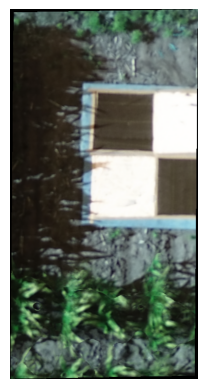

In [40]:
img=cv.imread("/home/schnablelab/Documents/ImageDataset/RGB_UAV/Ames/Hybrids/TP1/Ames-TP1-4231_1_3.PNG")
print(img.shape)
plt.axis('off')
plt.imshow(img)
plt.savefig('/home/schnablelab/Desktop//Ames-TP1-4231_1_3_uav.png',bbox_inches='tight')

In [5]:
# threebandsatelliteimagecrop(inputpath="/home/schnablelab/Documents/ImageDataset/RGB_satellite/Scottsbluff/Hybrids/TP1", crop_width=10, crop_height=22,outputpath="/home/schnablelab/Documents/ImageDataset/RGB_satellite/Scottsbluff/Hybrids/CroppedTP1")

In [53]:
# threebandsatelliteimagecrop(inputpath="/home/schnablelab/Documents/ImageDataset/RGB_satellite/Scottsbluff/Hybrids/TP1", crop_width=12, crop_height=24,outputpath="/home/schnablelab/Documents/ImageDataset/RGB_satellite/Scottsbluff/Hybrids/CroppedTP1")

In [10]:
# multibandimagecrop(inputpath="/home/schnablelab/Documents/ImageDataset/SixBndImages/Ames/Hybrids/TP6/",crop_width=10, crop_height=20,outputpath="/home/schnablelab/Documents/ImageDataset/SixBndImages/Ames/Hybrids/CroppedTP6/")

In [6]:
# threebanduavimagecrop(inputpath="/home/schnablelab/Documents/ImageDataset/RGB_UAV/Scottsbluff/Hybrids/TP1" ,crop_width=220, crop_height=580,outputpath="/home/schnablelab/Documents/ImageDataset/RGB_UAV/Scottsbluff/Hybrids/CroppedTP1/")